# Экспресс-основы Pandas "Фреймворки и фильтрация"

## Pandas

это пакет Python для обработки и анализа структурированных данных. <br>
Здесь добавлены два типа объектов - это Series - вектор и DataFrame - таблица.

In [21]:
# Импортируем пакеты
import pandas as pd
import numpy as np
import os

### Series

In [3]:
# Вектор
l = [15,11,16,14,13,12]
s = pd.Series(l)
s

0    15
1    11
2    16
3    14
4    13
5    12
dtype: int64


Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [4]:
s.describe()

count     6.000000
mean     13.500000
std       1.870829
min      11.000000
25%      12.250000
50%      13.500000
75%      14.750000
max      16.000000
dtype: float64

### DataFrame

#### Этап создания двумерной таблицы

In [5]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [6]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [7]:
df.columns

Index(['one', 'two'], dtype='object')

Вывод указанной колонки через индексацию

In [8]:
df['one']
# df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

Вывод значения строки

In [9]:
df['one']['d']

nan

Вывод диапазона строк

In [10]:
df['one']['b':'d']

b    2.0
c    3.0
d    NaN
Name: one, dtype: float64


Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [11]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3


#### Атрибут `loc`

In [12]:
# первая позиция - всегда индекс строки, 
# вторая - название столбца.
print(
    df.loc['b'], 
    df.loc['b','one'], 
    df.loc['a':'b','one'], 
    df.loc[:,'one'], 
    sep = '\n\n'
    )

one    2.0
two    2.0
Name: b, dtype: float64

2.0

a    1.0
b    2.0
Name: one, dtype: float64

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64


In [13]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [14]:
df.loc[:,'one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

#### Добавление новых столбцов

In [15]:
df['three']=df['one']*df['two']
df['flag']=df['two']>2
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


Фильтрация по True

In [16]:
df[df['flag'] == True]

,one,two,three,flag
c,3.0,3,9.0,True
d,NaN,4,NaN,True


Удаление столбцов

In [17]:
del df['two']
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,True


Добавим копию столбца `one`, в которую входят только строки до второй.

In [18]:
df['one_tr']=df['one'][:2]
df

,one,three,flag,one_tr
a,1.0,1.0,False,1.0
b,2.0,4.0,False,2.0
c,3.0,9.0,True,NaN
d,NaN,NaN,True,NaN


#### Объединение таблиц

In [22]:
df1=df.loc[:,['one','one_tr']]

df2=pd.DataFrame({'one':{'e':0,'f':1},'one_tr':{'e':2}})

pd.concat([df1,df2], axis=0)

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN
e,0.0,2.0
f,1.0,NaN


Объединим по строкам.

In [23]:
pd.concat([df1,df2],axis=1)

,one,one_tr,one,one_tr
a,1.0,1.0,NaN,NaN
b,2.0,2.0,NaN,NaN
c,3.0,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN
e,NaN,NaN,0.0,2.0
f,NaN,NaN,1.0,NaN


#### Создание таблицы из массива случайных чисел

In [24]:
# np.random.randn - возвращает значения из нормального распределения по размеру таблицы

df = pd.DataFrame(np.random.randn(5,4),
                columns=['A','B','C','D'])
df

,A,B,C,D
0,1.067439,0.102787,-0.410489,0.537684
1,0.653022,-1.501926,1.622636,1.274496
2,0.983004,1.364571,0.151917,0.689075
3,3.482229,-0.979104,-1.354497,0.508274
4,-0.547273,0.060205,0.735471,-0.240338


In [25]:
df2 = pd.DataFrame(np.random.randn(3,3),columns=['A','B','C'])
2*df+3+df2 

,A,B,C,D
0,5.352143,3.675619,1.760328,NaN
1,3.627707,-0.474702,5.122253,NaN
2,4.556075,7.669286,2.593712,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [26]:
df # Таблицы после сложения не изменилась. Нужно присваивать

,A,B,C,D
0,1.067439,0.102787,-0.410489,0.537684
1,0.653022,-1.501926,1.622636,1.274496
2,0.983004,1.364571,0.151917,0.689075
3,3.482229,-0.979104,-1.354497,0.508274
4,-0.547273,0.060205,0.735471,-0.240338


In [27]:
df.describe()

,A,B,C,D
count,5.000000,5.000000,5.000000,5.000000
mean,1.127684,-0.190693,0.149007,0.553838
std,1.466222,1.107797,1.127951,0.540992
min,-0.547273,-1.501926,-1.354497,-0.240338
25%,0.653022,-0.979104,-0.410489,0.508274
50%,0.983004,0.060205,0.151917,0.537684
75%,1.067439,0.102787,0.735471,0.689075
max,3.482229,1.364571,1.622636,1.274496


Можем отсортировать по значениям в колонке.

In [28]:
df.sort_values(by='C')

,A,B,C,D
3,3.482229,-0.979104,-1.354497,0.508274
0,1.067439,0.102787,-0.410489,0.537684
2,0.983004,1.364571,0.151917,0.689075
4,-0.547273,0.060205,0.735471,-0.240338
1,0.653022,-1.501926,1.622636,1.274496


#### Атрибут `iloc` 

In [29]:
# первая позиция - всегда индекс строки, 
# вторая - индекс столбца.
print(
    df.iloc[2], 
    df.iloc[1:3, 0:2], 
    sep = '\n\n'
    )

A    0.983004
B    1.364571
C    0.151917
D    0.689075
Name: 2, dtype: float64

          A         B
1  0.653022 -1.501926
2  0.983004  1.364571


Посчитаем кумулятивные суммы.

In [37]:
cs=df.cumsum()
cs

,A,B,C,D
0,0.903198,-0.414376,-2.269374,-0.989468
1,1.421060,-1.315333,-1.901202,0.916218
2,0.367633,-1.480337,-2.704567,-0.777537
3,2.325626,-1.441655,-2.190750,-0.444734
4,3.743301,-1.845082,-1.192786,-0.149669


И построим график.

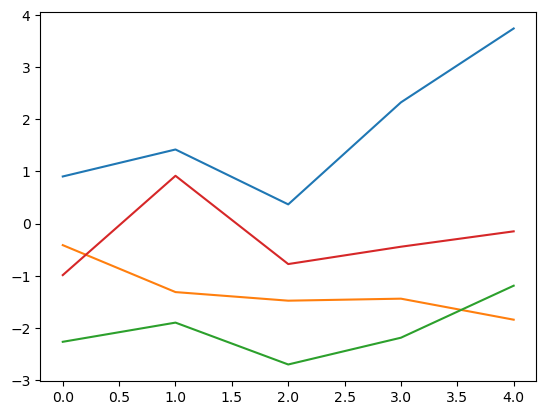

In [40]:
plt.plot(cs);

## Условия фильтрации

### Создание датафрейма зарплат

In [30]:
# Создадим фрейм зарплат
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Carol', 'Frank', 'Eve'],
    'position': ['Senior', 'Middle', 'Lead', 'Junior', 'Middle'],
    'salary': [100000, 99817, 122908, 88123, 93121]
    })
df

,name,position,salary
0,Alice,Senior,100000
1,Bob,Middle,99817
2,Carol,Lead,122908
3,Frank,Junior,88123
4,Eve,Middle,93121


### Способ фильтрации 1 - условие внутри индексации

In [31]:
df_tall = df[df['salary'] >= 100000]
df_tall

,name,position,salary
0,Alice,Senior,100000
2,Carol,Lead,122908


In [32]:
# Множественное условие
df[(df['salary'] >= 100000) & (df['position'] == 'Lead')]

,name,position,salary
2,Carol,Lead,122908


### Способ фильтрации 2 - запрос

In [34]:
limit = 100000
df.query("position != 'Lead' & salary >= @limit")

# df_tall_named_trd = df.query('height < 175 & `name` != "Taras Shevchenko"')
# df_tall_named_trd

,name,position,salary
0,Alice,Senior,100000


### Способ фильтрации 3 - методы loc() и iloc()

In [35]:
# Первый аргумент - условие фильтрации строк
# Второй аргумент - выбранные столбцы

df.loc[df['salary'] >= 100000, ['name', 'position']]

,name,position
0,Alice,Senior
2,Carol,Lead


In [36]:
# df.iloc[:, 2:3]  # Срез по индексам
# df.iloc[:, 2:3].stack()  # .stack() - превращает колонки в подуровневые колонки
# df.iloc[:,2:3].stack().apply(lambda x: int(x) >= 100000)  # .apply() - применит к выбранному массиву лямбда-функцию 
# df.iloc[:,2:3].stack().apply(lambda x: int(x) >= 100000).unstack()  # .unstack() - превращает строки в колонки

mask = df.iloc[:, 2:3].stack().apply(lambda x: int(x) >= 100000).unstack()
df[mask.salary]

,name,position,salary
0,Alice,Senior,100000
2,Carol,Lead,122908


In [37]:
df['salary'].mean()

100793.8

In [101]:
# Отчет по данным
calc_df = df[df.salary >= 10000].groupby("salary").salary.aggregate(lambda x: (x-df['salary'].mean())/df['salary'].mean()*100)
calc_df

salary
88123    -12.571011
93121     -7.612373
99817     -0.969107
100000    -0.787548
122908    21.940040
Name: salary, dtype: float64

## Чтение файлов

### Полученные данных из файла .csv (универсальный формат таблицы)

In [38]:
# Функция os.getcwd() возвращает до путь текущего каталога
reviews = pd.read_csv(f'{os.getcwd()}/winemag-data_first150k.csv.gz',compression='gzip' )

### Чтение exсel-файлов

In [43]:
# conda install openpyxl
data = pd.read_excel(f'{os.getcwd()}/lesson_01.xlsx')

In [ ]:
data.head()

,1. Как часто вы посещаете университет?,2. Категория занятости работника,3. Пол респондента,4. Возраст первого вступления в брак,5. Население в 1000 чел,"6. Количество лет, затраченных на образование",7. Зарплата в настоящее время
0,Не прихожу вообще,Полная занятость,Муж,20.0,7072.0,11,10680.0
1,Посещаю каждое занятие,Полная занятость,Муж,25.0,7072.0,16,8940.0
2,Посещаю несколько раз в неделю,Полная занятость,Жен,25.0,7072.0,16,16080.0
3,Посещаю несколько раз за семестр,Частичная занятость,Жен,22.0,7072.0,15,11640.0
4,Посещаю каждое занятие,Пенсионер (ка),Жен,24.0,7072.0,17,41400.0


### С запись в формат .xlsx  

Обязательно укажите имя листа!

In [44]:
writer = pd.ExcelWriter('output.xlsx')
data.to_excel(writer, sheet_name ='research')

## Пример обработки таблиц с помощью Pandas

### Загрузка статистических данных по демографии в США за 2015 год

In [45]:
data = pd.read_csv(f'{os.getcwd()}/acs2015_census_tract_data.csv.gz', compression='gzip')

In [46]:
data.shape  # Размерность таблицы

(74001, 37)

In [47]:
data.head(3)  # Первые три строки

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2


In [48]:
print('У нас {} строк и {} колонок'.format(*data.shape))
print('---')
print(data.info())

У нас 74001 строк и 37 колонок
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      74001 non-null  int64  
 1   State            74001 non-null  object 
 2   County           74001 non-null  object 
 3   TotalPop         74001 non-null  int64  
 4   Men              74001 non-null  int64  
 5   Women            74001 non-null  int64  
 6   Hispanic         73311 non-null  float64
 7   White            73311 non-null  float64
 8   Black            73311 non-null  float64
 9   Native           73311 non-null  float64
 10  Asian            73311 non-null  float64
 11  Pacific          73311 non-null  float64
 12  Citizen          74001 non-null  int64  
 13  Income           72901 non-null  float64
 14  IncomeErr        72901 non-null  float64
 15  IncomePerCap     73261 non-null  float64
 16  IncomePerCapErr  73261 

### Работа с колонками  

Вывести список с названиями колонок с помощью метода .columns

In [49]:
data.columns

Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [50]:
# Попробуем выбрать конкретные колонки

data[['State','County','Unemployment']].head()

,State,County,Unemployment
0,Alabama,Autauga,5.4
1,Alabama,Autauga,13.3
2,Alabama,Autauga,6.2
3,Alabama,Autauga,10.8
4,Alabama,Autauga,4.2


In [51]:
# Указание название колонки через точку
data.CensusTract.head(n=10)

0    1001020100
1    1001020200
2    1001020300
3    1001020400
4    1001020500
5    1001020600
6    1001020700
7    1001020801
8    1001020802
9    1001020900
Name: CensusTract, dtype: int64

In [52]:
data[0:5] # Напоминаю, что индексация в Python ведется с 0.

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [53]:
# Последние 5 строк
data.tail(5)
# data[-5:]

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
73996,72153750501,Puerto Rico,Yauco,6205,3291,2914,99.7,0.3,0.0,0.0,...,0.9,3.3,2.3,22.5,1659,64.7,31.3,3.9,0.0,21.3
73997,72153750502,Puerto Rico,Yauco,2122,921,1201,99.2,0.3,0.0,0.0,...,0.0,0.0,0.0,23.5,484,64.0,32.6,3.3,0.0,22.4
73998,72153750503,Puerto Rico,Yauco,2277,1097,1180,99.5,0.4,0.0,0.0,...,3.2,0.0,3.0,29.8,582,58.2,32.3,9.5,0.0,23.3
73999,72153750601,Puerto Rico,Yauco,5267,2663,2604,98.8,1.2,0.0,0.0,...,0.0,0.0,0.0,26.9,1369,67.5,31.2,1.3,0.0,26.7
74000,72153750602,Puerto Rico,Yauco,2741,1181,1560,99.3,0.7,0.0,0.0,...,0.0,0.0,14.9,26.8,496,72.8,19.6,7.7,0.0,20.1


Перевернем датафрейм с 73996 строки, передав -1 третьим аргументом в методе.

In [54]:
chunk = data[73996:] 
chunk[::-1] 

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
74000,72153750602,Puerto Rico,Yauco,2741,1181,1560,99.3,0.7,0.0,0.0,...,0.0,0.0,14.9,26.8,496,72.8,19.6,7.7,0.0,20.1
73999,72153750601,Puerto Rico,Yauco,5267,2663,2604,98.8,1.2,0.0,0.0,...,0.0,0.0,0.0,26.9,1369,67.5,31.2,1.3,0.0,26.7
73998,72153750503,Puerto Rico,Yauco,2277,1097,1180,99.5,0.4,0.0,0.0,...,3.2,0.0,3.0,29.8,582,58.2,32.3,9.5,0.0,23.3
73997,72153750502,Puerto Rico,Yauco,2122,921,1201,99.2,0.3,0.0,0.0,...,0.0,0.0,0.0,23.5,484,64.0,32.6,3.3,0.0,22.4
73996,72153750501,Puerto Rico,Yauco,6205,3291,2914,99.7,0.3,0.0,0.0,...,0.9,3.3,2.3,22.5,1659,64.7,31.3,3.9,0.0,21.3


In [55]:
data[::10000]  # Вывод каждой тысячной строки

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
10000,6075032901,California,San Francisco,5608,2761,2847,6.8,25.7,0.9,0.0,...,0.5,2.8,5.8,37.3,2745,73.6,19.1,7.2,0.2,7.0
20000,13227050100,Georgia,Pickens,5119,2645,2474,2.9,95.6,1.2,0.0,...,0.4,1.3,24.1,38.8,1814,75.7,9.5,14.8,0.0,12.3
30000,24005404501,Maryland,Baltimore,6970,3118,3852,12.8,57.0,23.4,0.0,...,1.0,1.7,2.4,35.2,3637,83.5,9.8,6.7,0.0,5.8
40000,32003003635,Nevada,Clark,5941,2957,2984,37.5,30.7,11.9,2.9,...,1.4,0.7,1.4,26.7,3175,78.3,18.9,2.9,0.0,9.8
50000,37179020602,North Carolina,Union,4998,2440,2558,32.6,44.3,23.0,0.0,...,6.2,2.2,1.3,21.1,2068,90.4,6.7,2.9,0.0,12.8
60000,46077958200,South Dakota,Kingsbury,2069,1027,1042,0.7,97.8,0.0,0.0,...,5.4,0.4,7.8,18.4,1060,73.6,11.1,15.0,0.3,2.4
70000,53033011600,Washington,King,6570,2866,3704,3.2,86.5,0.8,1.3,...,1.6,2.5,7.8,32.8,3835,76.8,15.8,7.0,0.4,2.7


In [56]:
data.iloc[1:5,:] # первые 5 строк всей таблицы

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [57]:
data.iloc[1:5,1:10] # первые 5 строк первых 10 столбцов

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native
1,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0
2,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5
3,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6
4,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0


In [58]:
data.iloc[1:5,-5:] # первые 5 строк последних 5 столбцов

,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1,77.0,16.9,6.1,0.0,13.3
2,64.1,23.6,12.3,0.0,6.2
3,75.7,21.2,3.1,0.0,10.8
4,67.1,27.6,5.3,0.0,4.2


### Агрегация данных

посмотрим где процент чернокожего населения в США больше 50 процентов.

In [59]:
data[data['Black'] > 50].head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
11,1001021100,Alabama,Autauga,3295,1666,1629,0.5,44.5,54.3,0.0,...,1.3,3.2,2.6,32.6,1496,70.7,24.7,4.6,0.0,7.3
17,1003010600,Alabama,Baldwin,3398,1821,1577,3.5,34.0,62.5,0.0,...,1.0,0.9,0.7,20.4,1392,71.7,23.9,4.5,0.0,5.7
45,1005950200,Alabama,Barbour,4320,2796,1524,1.8,32.7,63.3,0.6,...,4.0,3.3,1.2,24.9,873,66.8,28.8,4.5,0.0,22.9
50,1005950700,Alabama,Barbour,1896,792,1104,0.3,38.5,61.0,0.0,...,4.5,0.0,0.0,15.6,675,76.9,19.1,4.0,0.0,13.1


Посмотрим только штаты для этого условия

In [60]:
data[data['Black'] > 50]['State'].head()

1     Alabama
11    Alabama
17    Alabama
45    Alabama
50    Alabama
Name: State, dtype: object

In [61]:
# Выведем все уникальные значения штатов

data[data['Black'] > 50]['State'].unique()
# data[data['Black'] > 50]['State'].drop_duplicates()

array(['Alabama', 'Arkansas', 'California', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Nebraska', 'Nevada', 'New Jersey', 'New York',
       'North Carolina', 'Ohio', 'Oklahoma', 'Pennsylvania',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Wisconsin'],
      dtype=object)

In [62]:
# где больше половины чернокожего населения и процент безработицы больше 50 процентов
data[(data['Black'] > 50)&(data['Unemployment']>50)]['State'].unique()

array(['District of Columbia', 'Florida', 'Georgia', 'Illinois',
       'Michigan', 'New York', 'Ohio', 'Pennsylvania', 'Texas'],
      dtype=object)

In [63]:
data.describe()

,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,7.400100e+04,74001.000000,74001.000000,74001.000000,73311.000000,73311.000000,73311.000000,73311.000000,73311.000000,73311.000000,...,73204.000000,73204.000000,73204.000000,73052.000000,74001.000000,73194.000000,73194.000000,73194.000000,73194.000000,73199.000000
mean,2.839113e+10,4325.591465,2127.648816,2197.942649,16.862810,62.032106,13.272581,0.727726,4.588253,0.145012,...,3.123340,1.891606,4.368093,25.667357,1983.907366,78.975238,14.621566,6.233814,0.169772,9.028663
std,1.647593e+10,2129.306903,1072.332031,1095.730931,22.940695,30.684152,21.762483,4.488340,8.794003,1.037354,...,5.881237,2.596198,3.904990,6.964881,1073.429808,8.345758,7.535786,4.042990,0.458227,5.955441
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.303901e+10,2891.000000,1409.000000,1461.000000,2.400000,39.400000,0.700000,0.000000,0.200000,0.000000,...,0.400000,0.400000,1.800000,20.800000,1249.000000,74.600000,9.600000,3.500000,0.000000,5.100000
50%,2.804700e+10,4063.000000,1986.000000,2066.000000,7.000000,71.400000,3.700000,0.000000,1.400000,0.000000,...,1.400000,1.100000,3.500000,25.000000,1846.000000,80.100000,13.400000,5.500000,0.000000,7.700000
75%,4.200341e+10,5442.000000,2674.000000,2774.000000,20.400000,88.300000,14.400000,0.400000,4.800000,0.000000,...,3.500000,2.500000,5.900000,29.800000,2553.000000,84.600000,18.200000,8.100000,0.000000,11.400000
max,7.215375e+10,53812.000000,27962.000000,27250.000000,100.000000,100.000000,100.000000,100.000000,91.300000,84.700000,...,100.000000,100.000000,100.000000,80.000000,24075.000000,100.000000,100.000000,100.000000,26.500000,100.000000


In [64]:
# посчитаем количество строк/событий/наблюдений по штату
data.State.value_counts().head()

California      8057
Texas           5265
New York        4918
Florida         4245
Pennsylvania    3218
Name: State, dtype: int64

In [65]:
# Нормализируем значения, чтобы в сумме получилось 1. 
# Приведем к процентам, умножив на 100
data.State.value_counts(normalize=True).head()*100

California      10.887691
Texas            7.114769
New York         6.645856
Florida          5.736409
Pennsylvania     4.348590
Name: State, dtype: float64

In [66]:
# количество мужчин и женщин в штатах с условиями, которые были выше. 
# И сделать обычную табличку с процентом от колонки, чтобы понять в каком штате хуже условия
data[(data['Black'] > 50)&(data['Unemployment']>50)].groupby('State')

In [67]:
data[(data['Black'] > 50)&(data['Unemployment']>30)].groupby('State')[['Men', 'Women']].sum().head()

,Men,Women
State,,
Alabama,20696,25350
Arkansas,3107,3783
California,4849,2626
Connecticut,3362,3599
Delaware,1487,2129


### Итоговая таблица

До этого мы выводили объекты, а сейчас мы создадим новые объекты с нашими условиями с которым уже будет гораздо более удобнее работать.  

Посчитаем туже самую табличку, но в процентах.  

`gender_sum` - это наша таблица  
`total` - это сумма всех значений по мужчинам и женщинам  

In [68]:
import time # импортируем модуль времени, чтобы оценить наш код

%time

gender_sum = data[(data['Black'] > 50)&(data['Unemployment']>30)].groupby('State')[['Men', 'Women']].sum()

total = data[(data['Black'] > 50)&(data['Unemployment']>30)].groupby('State')[['Men', 'Women']].sum().sum()

result = gender_sum/total*100

result.head()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


,Men,Women
State,,
Alabama,4.212866,4.468661
Arkansas,0.632459,0.666862
California,0.987060,0.462907
Connecticut,0.684367,0.634426
Delaware,0.302693,0.375297
